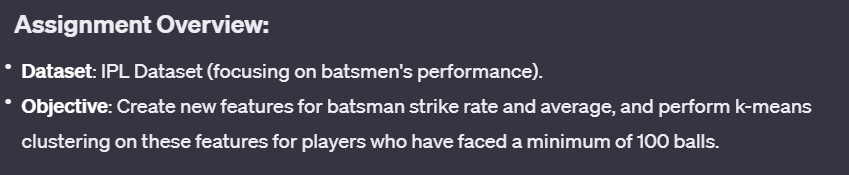

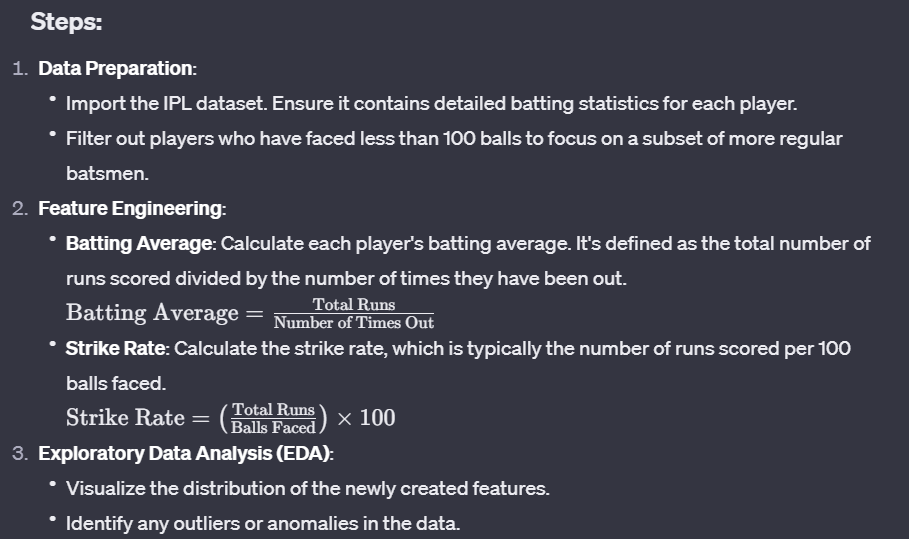

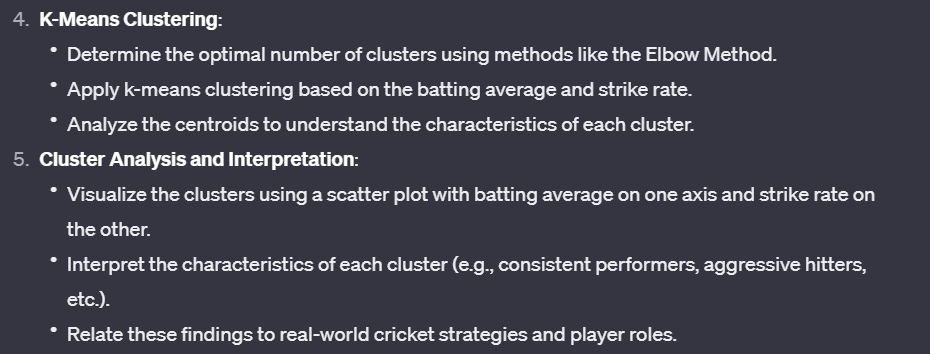

### 1. Import Libraries

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from cdbw import CDbw

### 2. Import Dataset

In [352]:
df=pd.read_csv(r"C:\Users\Debasish Das\Documents\01_ML Project\Unsupervised ML\Clustering\IPL_Ball_by_Ball_2008_2022.csv")

In [353]:
def read_data(path):
    return pd.read_csv(path)

In [354]:
df=read_data(r"C:\Users\Debasish Das\Documents\01_ML Project\Unsupervised ML\Clustering\IPL_Ball_by_Ball_2008_2022.csv")

In [355]:
df.head(3)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals


### 3. Feature Engineering

In [356]:
eligible_batsman = df['batter'].value_counts()
eligible_batsman=eligible_batsman[eligible_batsman>100].index

In [357]:
eligible_batsman

Index(['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina',
       'RV Uthappa', 'MS Dhoni', 'G Gambhir', 'CH Gayle', 'AB de Villiers',
       ...
       'SE Rutherford', 'RJ Quiney', 'UT Khawaja', 'AB McDonald', 'DJ Harris',
       'SL Malinga', 'B Lee', 'DJM Short', 'RD Chahar', 'DJ Jacobs'],
      dtype='object', name='batter', length=265)

In [358]:
new_df=df[df["batter"].isin(eligible_batsman)]

In [359]:
new_df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225942,335982,2,13,4,P Kumar,SC Ganguly,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225943,335982,2,13,5,P Kumar,SC Ganguly,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225944,335982,2,13,6,P Kumar,SC Ganguly,SB Joshi,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [360]:
new_df.shape

(215697, 17)

In [361]:
run_ser=new_df.groupby(["batter"]).sum()["batsman_run"]

In [362]:
run_ser

batter
A Ashish Reddy      280
A Badoni            161
A Mishra            362
A Symonds           974
AA Jhunjhunwala     217
                   ... 
YBK Jaiswal         547
YK Pathan          3222
YV Takawale         192
Yuvraj Singh       2754
Z Khan              117
Name: batsman_run, Length: 265, dtype: int64

In [363]:
out_ser=new_df["player_out"].value_counts()

In [364]:
out_ser

player_out
RG Sharma     194
V Kohli       182
RV Uthappa    180
S Dhawan      179
SK Raina      171
             ... 
SA Abbott       1
PV Tambe        1
LJ Wright       1
MS Gony         1
D Salunkhe      1
Name: count, Length: 311, dtype: int64

In [365]:
out_ser = out_ser[out_ser.index.isin(eligible_batsman)]

In [366]:
avg=(run_ser/out_ser).reset_index().rename(columns={"index":"batter", 0:"Average"})

In [367]:
avg

,batter,Average
0,A Ashish Reddy,18.666667
1,A Badoni,20.125000
2,A Mishra,12.066667
3,A Symonds,36.074074
4,AA Jhunjhunwala,16.692308
...,...,...
260,YBK Jaiswal,23.782609
261,YK Pathan,29.559633
262,YV Takawale,24.000000
263,Yuvraj Singh,25.036364


In [368]:
avg.sort_values("Average",ascending=False)

,batter,Average
146,MN van Wyk,55.666667
111,KL Rahul,46.927711
9,AC Voges,45.250000
82,HM Amla,44.384615
64,DP Conway,42.000000
...,...,...
144,MM Sharma,8.714286
27,B Kumar,8.607143
264,Z Khan,8.357143
69,DW Steyn,7.590909


In [369]:
ball_ser=new_df.batter.value_counts()

In [370]:
strike_rates=(run_ser*100/ball_ser).reset_index().rename(columns={"index":"Batter",0:"Strike_Rate" })

In [371]:
strike_rates.sort_values("Strike_Rate", ascending=False)

,batter,Strike_Rate
12,AD Russell,168.234323
33,BCJ Cutting,163.013699
104,K Gowtham,161.739130
98,JM Sharma,157.046980
122,LS Livingstone,155.965909
...,...,...
217,SL Malinga,85.436893
264,Z Khan,82.978723
45,CJ Ferguson,82.352941
117,Kuldeep Yadav,80.769231


In [372]:
final_df = avg.merge(strike_rates,on="batter")

In [373]:
final_df

,batter,Average,Strike_Rate
0,A Ashish Reddy,18.666667,142.857143
1,A Badoni,20.125000,115.827338
2,A Mishra,12.066667,88.292683
3,A Symonds,36.074074,124.711908
4,AA Jhunjhunwala,16.692308,99.541284
...,...,...,...
260,YBK Jaiswal,23.782609,133.414634
261,YK Pathan,29.559633,138.046272
262,YV Takawale,24.000000,104.918033
263,Yuvraj Singh,25.036364,124.784776


In [374]:
type(final_df)

pandas.core.frame.DataFrame

In [375]:
X=final_df.iloc[:,1:]

In [376]:
X

,Average,Strike_Rate
0,18.666667,142.857143
1,20.125000,115.827338
2,12.066667,88.292683
3,36.074074,124.711908
4,16.692308,99.541284
...,...,...
260,23.782609,133.414634
261,29.559633,138.046272
262,24.000000,104.918033
263,25.036364,124.784776


Text(0.5, 1.0, 'Avg vs Strike Rate')

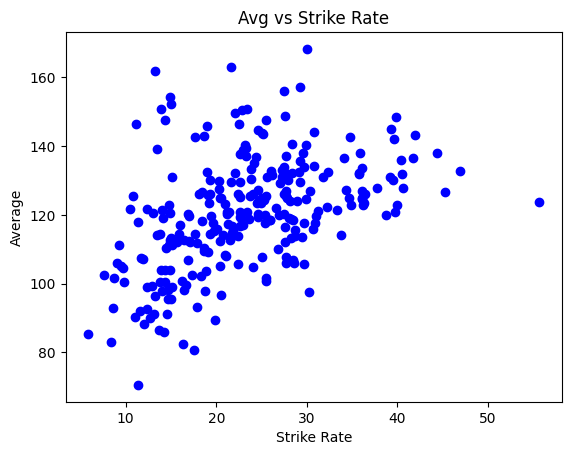

In [377]:
plt.scatter(x=X["Average"],y=X["Strike_Rate"],color="Blue")
plt.xlabel("Strike Rate")
plt.ylabel("Average")
plt.title("Avg vs Strike Rate")

### 4. Model Build & Evaluation

In [379]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_init = 100, n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i,"Kmeans",silhouette_score(X,kmeans.labels_))

2 Kmeans 0.4362386634124337
3 Kmeans 0.4025937345478488
4 Kmeans 0.382981701253559
5 Kmeans 0.35185421309377257
6 Kmeans 0.3420726492175884
7 Kmeans 0.34241105221133805
8 Kmeans 0.3702497632813562
9 Kmeans 0.3814983255513984
10 Kmeans 0.3706979652584843


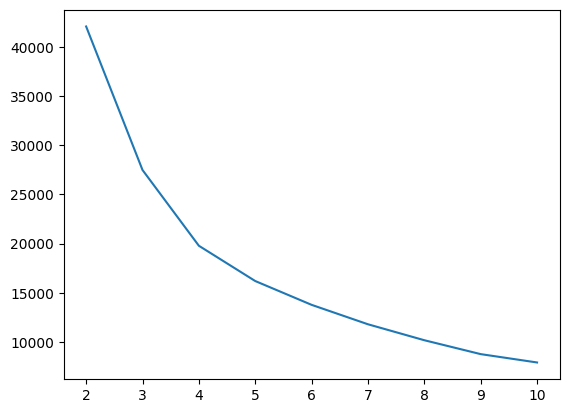

In [382]:
plt.plot(range(2,11),wcss)

In [383]:
kmeans = KMeans(n_init = 100, n_clusters = 4)

In [384]:
y_kmeans = kmeans.fit_predict(X)

In [385]:
X=X.values

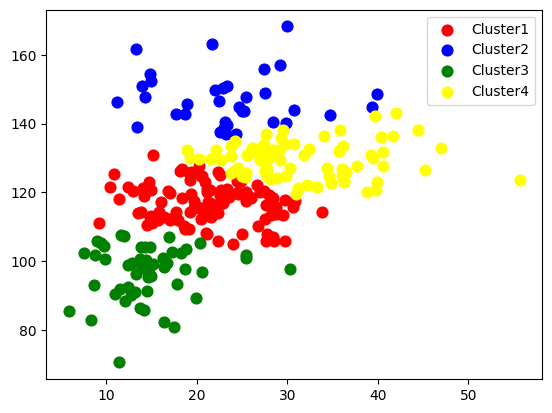

In [386]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
plt.legend()
plt.show()

In [387]:
kmeans.labels_

array([1, 0, 2, 3, 2, 0, 0, 1, 3, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       1, 3, 2, 0, 0, 2, 0, 3, 3, 3, 0, 1, 3, 3, 1, 0, 3, 0, 3, 2, 3, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 0,
       3, 2, 0, 2, 3, 0, 3, 2, 3, 0, 2, 0, 1, 0, 0, 1, 3, 0, 0, 0, 3, 0,
       1, 1, 1, 3, 0, 2, 0, 0, 3, 3, 1, 0, 3, 3, 3, 2, 1, 2, 1, 0, 3, 3,
       3, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 3, 3,
       2, 0, 3, 1, 2, 1, 1, 0, 0, 0, 3, 1, 2, 2, 3, 3, 0, 0, 3, 2, 3, 0,
       1, 2, 1, 3, 2, 2, 3, 0, 3, 2, 2, 0, 0, 2, 1, 0, 3, 1, 0, 2, 1, 3,
       0, 0, 0, 0, 2, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 3, 2, 2, 0, 3, 1, 1,
       0, 2, 3, 1, 0, 0, 3, 3, 2, 0, 0, 0, 3, 2, 2, 3, 2, 3, 2, 2, 1, 3,
       0, 3, 0, 1, 0, 2, 1, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 3, 2, 0, 2, 3, 1, 0, 0, 2, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2])

In [388]:
s_score_kmeans = silhouette_score(X, kmeans.labels_)
cdbw_Kmeans = CDbw(X, kmeans.labels_)

In [389]:
print(s_score_kmeans)
print(cdbw_Kmeans)

0.382981701253559
0.004656617851915868
